# Probando la idea

La meta de este notebook es crear unos ipywidgets donde escojas el estado y municipio de un dataset y creamos un mapa con los geodatos.

In [43]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import ipywidgets as widgets
import gpdvega
import altair as alt
%matplotlib inline
%run theme.py

In [8]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [9]:
DATOS_PROCESADOS = Path("../../datos/procesados/")

In [10]:
geodatos = gpd.read_file(DATOS_PROCESADOS / 'AGEBS_limpios' / 'AGEBS_limpio.shp')

In [11]:
estados = pd.read_csv(DATOS_PROCESADOS / 'agebs.csv')

In [12]:
estados.head()

Entidad Federativa       Municipio         CVEGEO Rango de pobreza (%)  \
0     Aguascalientes  Aguascalientes  0100100010229             [ 0, 18]   
1     Aguascalientes  Aguascalientes  0100100010233             (34, 50]   
2     Aguascalientes  Aguascalientes  0100100010286             [ 0, 18]   
3     Aguascalientes  Aguascalientes  0100100010290             [ 0, 18]   
4     Aguascalientes  Aguascalientes  0100100010303             (18, 34]   

  Rango de pobreza extrema (%)  
0                     [ 0, 20]  
1                     [ 0, 20]  
2                     [ 0, 20]  
3                     [ 0, 20]  
4                     [ 0, 20]

In [13]:
geodatos.head()

CVEGEO                                           geometry
0  010010001216A  POLYGON ((2472175.610600002 1095222.905299997,...
1  0100100012649  POLYGON ((2474436.9925 1094330.964100001, 2474...
2  010010001383A  POLYGON ((2472973.671700002 1091954.736200001,...
3  010010001287A  POLYGON ((2468473.209200002 1093564.705600001,...
4  010010001084A  POLYGON ((2469318.936499998 1094912.738899997,...

In [14]:
geodatos.set_index("CVEGEO", inplace = True)
estados.set_index("CVEGEO", inplace = True)

In [15]:
datos = geodatos.join(estados, how = 'right',)

In [16]:
datos.head()

geometry  \
CVEGEO                                                             
0100100010229  POLYGON ((2470042.197700001 1101170.994099999,...   
0100100010233  POLYGON ((2467269.660700002 1099188.607099997,...   
0100100010286  POLYGON ((2468045.385799997 1097611.893399999,...   
0100100010290  POLYGON ((2468684.613600001 1097838.412899999,...   
0100100010303  POLYGON ((2469518.469700002 1098523.933899997,...   

              Entidad Federativa       Municipio Rango de pobreza (%)  \
CVEGEO                                                                  
0100100010229     Aguascalientes  Aguascalientes             [ 0, 18]   
0100100010233     Aguascalientes  Aguascalientes             (34, 50]   
0100100010286     Aguascalientes  Aguascalientes             [ 0, 18]   
0100100010290     Aguascalientes  Aguascalientes             [ 0, 18]   
0100100010303     Aguascalientes  Aguascalientes             (18, 34]   

              Rango de pobreza extrema (%)  
CVEGEO                                      
0100100010229                     [ 0, 20]  
0100100010233                     [ 0, 20]  
0100100010286                     [ 0, 20]  
0100100010290                     [ 0, 20]  
0100100010303                     [ 0, 20]

# creando widgets

In [40]:
def crear_mapa(widget_estados):
    # crea widgets
    widget_municipios = widgets.Dropdown(options = list(datos[datos['Entidad Federativa'] == widget_estados.value]['Municipio'].unique()), )
    widget_municipios
    
    # filtra datos
    mascara_estado = datos['Entidad Federativa'] == widget_estados.value
    mascara_municipio = datos['Municipio'] == widget_municipios.value
    
    datos_filtrados_estado = datos[mascara_estado].copy()
    datos_filtrados_municipio = datos[mascara_municipio]
    
    datos_filtrados_municipio.plot(column = 'Rango de pobreza (%)');

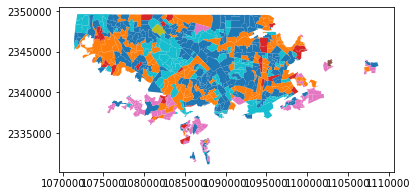

In [11]:
# probando a ver si funciona
crear_mapa(estado = 'Baja California', municipio = "Tijuana")

In [12]:
lista_estados = list(datos['Entidad Federativa'].unique())

In [18]:
widget_estados = widgets.Dropdown(options = lista_estados)
widget_estados

Dropdown(options=('Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila de Zaragoz…

In [20]:
widget_municipios = widgets.Dropdown(options = list(datos[datos['Entidad Federativa'] == widget_estados.value]['Municipio'].unique()), )
widget_municipios.obs

Dropdown(options=('Amacuzac', 'Atlatlahucan', 'Axochiapan', 'Ayala', 'Cuautla', 'Cuernavaca', 'Emiliano Zapata…

In [51]:
output = widgets.Output()

dropdown_estados = widgets.Dropdown(options = list(datos['Entidad Federativa'].unique()))
dropdown_municipios = widgets.Dropdown(options = list(datos[datos['Entidad Federativa'] == dropdown_estados.value]['Municipio'].unique()))

def primer_filtro(estado, municipio):
    output.clear_output()
    dropdown_municipios.options = list(datos[datos['Entidad Federativa'] == dropdown_estados.value]['Municipio'].unique())
    mascara_estado = (datos['Entidad Federativa'] == estado)
    mascara_municipio = (datos['Municipio'] == municipio)

    datos_filtrados = datos[mascara_estado].copy()
    datos_filtrados = datos[mascara_municipio].copy()
#     datos_filtrados.plot(column = 'Rango de pobreza (%)');

    # quita geometrias nan
    datos_filtrados.dropna(inplace = True)
    chart = make_altair_chart(datos_filtrados)
    chart.

    with output:
        display(primer_filtro)


def dropdown_estados_eventhandler(cambio):
    primer_filtro(cambio.new, dropdown_municipios.value)

def dropdown_municipios_eventhandler(cambio):
    primer_filtro(dropdown_estados.value, cambio.new)    

dropdown_estados.observe(dropdown_estados_eventhandler, names = 'value')
dropdown_municipios.observe(dropdown_municipios_eventhandler, names = 'value')

In [52]:
from IPython.display import display

In [53]:
display(dropdown_estados)
display(dropdown_municipios)

Dropdown(options=('Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila de Zaragoz…

Dropdown(options=('Aguascalientes', 'Asientos', 'Calvillo', 'Cosío', 'Jesús María', 'Pabellón de Arteaga', 'Ri…

LayerChart({
  data:                                                         geometry  \
  CVEGEO                                                             
  180010001007A  POLYGON ((2156629.177699998 1167325.311900001,...   
  1800100010173  POLYGON ((2155438.614900001 1168023.601299999,...   
  1800100010188  POLYGON ((2154927.941699997 1167814.351799997,...   
  180010001021A  POLYGON ((2156399.021799997 1169357.3816, 2156...   
  1800100010224  POLYGON ((2155546.585900001 1168878.064100003,...   
  1800100010239  POLYGON ((2155486.079499997 1167089.893099997,...   
  1800100010277  POLYGON ((2155636.313100003 1168406.912499998,...   
  1800100010281  POLYGON ((2156404.152099997 1168511.132100001,...   
  1800100010296  POLYGON ((2155880.176200002 1167982.965799997,...   
  1800100010309  POLYGON ((2155915.362199999 1167293.175200002,...   
  1800100010313  POLYGON ((2156043.578500003 1167926.571700001,...   
  1800100010328  POLYGON ((2156258.572400004 1169691.864500001,...   
 

In [20]:
def make_altair_chart(dataframe, municipio):
    # base
    mapa_base = alt.Chart(dataframe).mark_geoshape(
        stroke = '#C7C7C7',
        strokeWidth = 0.1,
    ).encode().properties(
        width = 600,
        height = 800,
    )

    # colores
    mapa_resultados = alt.Chart(dataframe).mark_geoshape(
        fill = 'lightgray',
        stroke = '#C7C7C7',
    ).encode(
        color = alt.Color(
            'Rango de pobreza (%):N',
            legend = alt.Legend(title = "Rango de pobreza",)
        ),
        #tooltip = ['Municipio:N','Enrique Cárdenas Sánchez:Q', 'Alberto Jiménez Merino:Q', 'Miguel Barbosa Huerta:Q', 'Votos nulos:Q', 'No registrados:Q', 'Lista nominal:Q', '% de abstencionismo']
    )
    return mapa_base + mapa_resultados


In [24]:
_mascara_estado = datos['Entidad Federativa'] == 'Baja California'
_mascara_municipio = datos['Municipio'] == 'Tijuana'

In [41]:
_dataframe = datos[_mascara_estado & _mascara_municipio].copy()
_dataframe.dropna(inplace = True)

_mapa_base = alt.Chart(_dataframe).mark_geoshape(
    stroke = '#C7C7C7',
    strokeWidth = 0.1,
).encode().properties(
    width = 800,
    height = 800,
)

# colores
_mapa_resultados = alt.Chart(_dataframe).mark_geoshape(
    fill = 'lightgray',
    stroke = '#C7C7C7',
).encode(
    color = alt.Color(
        'Rango de pobreza (%):N',
        legend = alt.Legend(title = "Rango de pobreza",)
    ),
    #tooltip = ['Municipio:N','Enrique Cárdenas Sánchez:Q', 'Alberto Jiménez Merino:Q', 'Miguel Barbosa Huerta:Q', 'Votos nulos:Q', 'No registrados:Q', 'Lista nominal:Q', '% de abstencionismo']
)

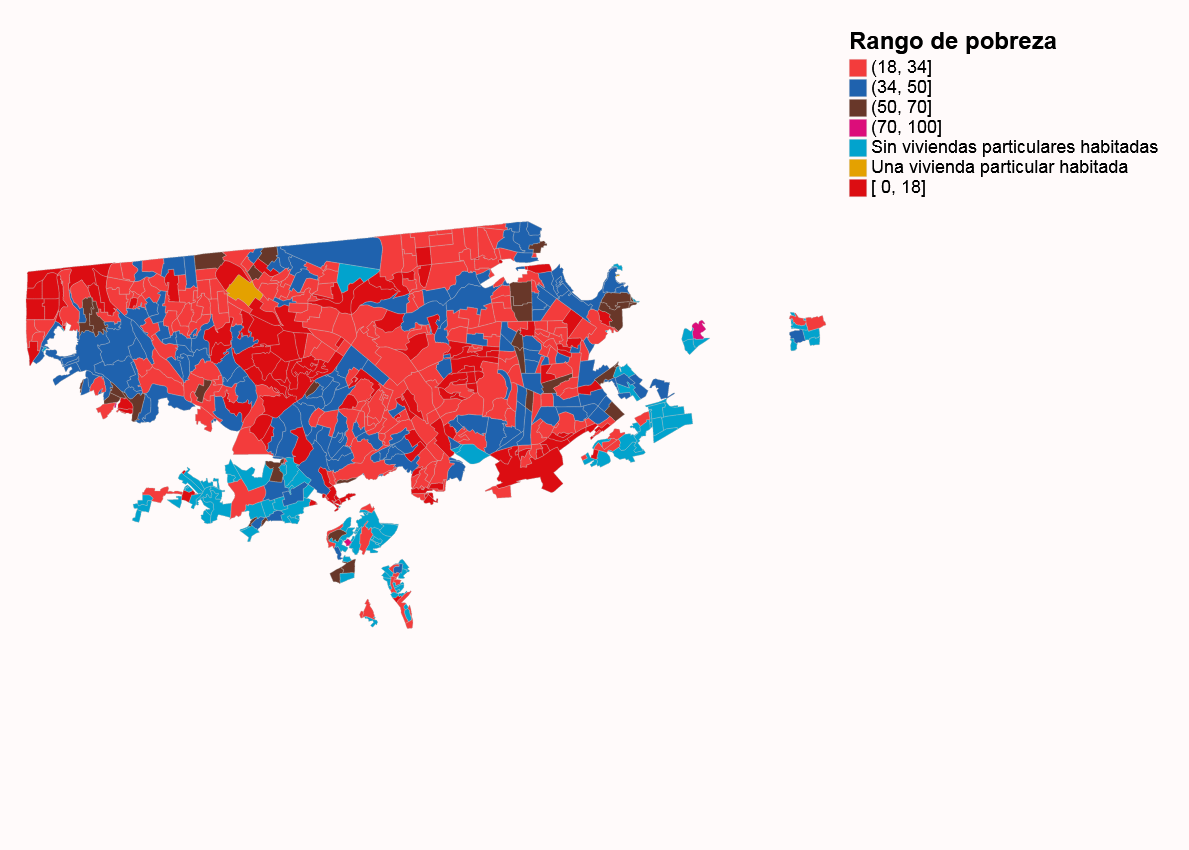

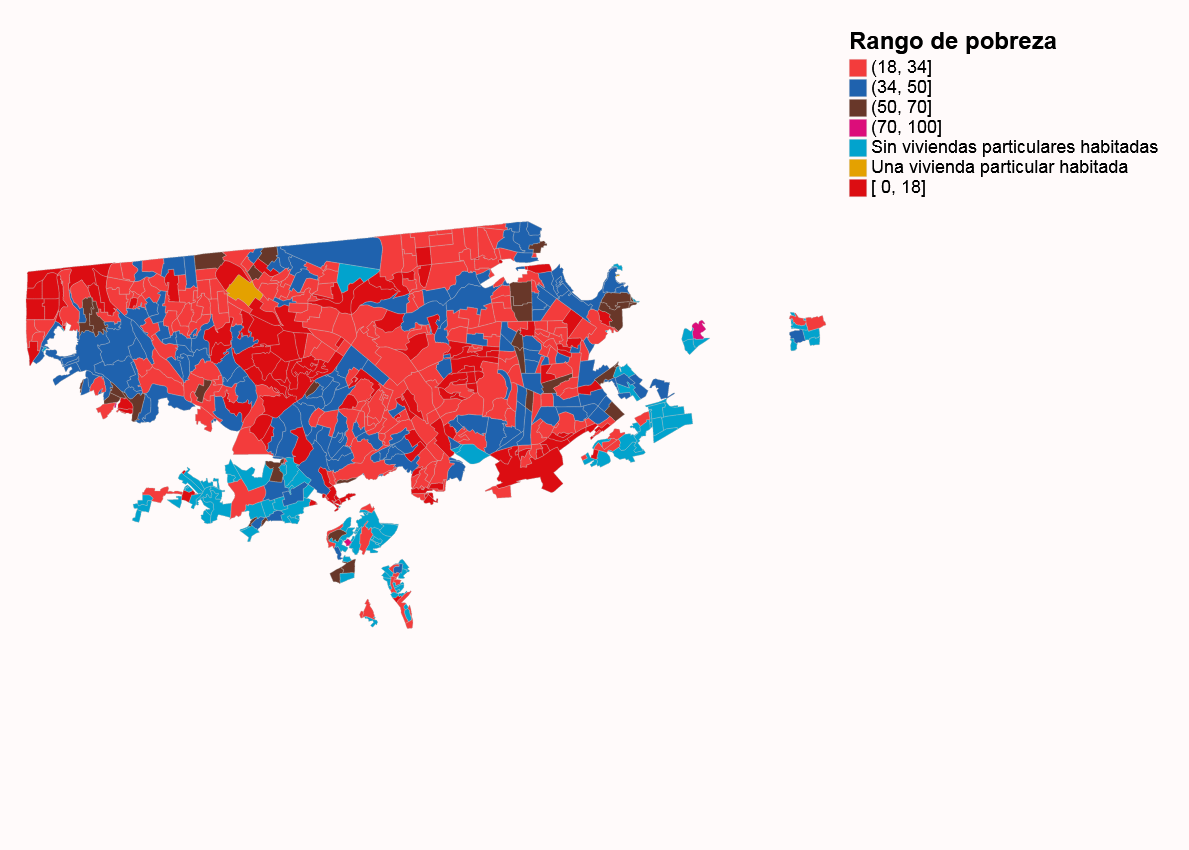

In [50]:
_mapa_base + _mapa_resultados

In [30]:
_dataframe.head()

geometry  \
CVEGEO                                                             
0200400002147                                                NaN   
0200400002185                                                NaN   
0200400010032  POLYGON ((1077184.380000004 2349562.766800001,...   
0200400010051  POLYGON ((1079624.9986 2349556.171500001, 1079...   
0200400010117  POLYGON ((1084420.458099999 2348943.3716, 1084...   

              Entidad Federativa Municipio Rango de pobreza (%)  \
CVEGEO                                                            
0200400002147    Baja California   Tijuana             (18, 34]   
0200400002185    Baja California   Tijuana             (18, 34]   
0200400010032    Baja California   Tijuana             (34, 50]   
0200400010051    Baja California   Tijuana             (34, 50]   
0200400010117    Baja California   Tijuana             (34, 50]   

              Rango de pobreza extrema (%)  
CVEGEO                                      
0200400002147                     [ 0, 20]  
0200400002185                     [ 0, 20]  
0200400010032                     [ 0, 20]  
0200400010051                     [ 0, 20]  
0200400010117                     [ 0, 20]

In [32]:
_dataframe.dropna(inplace = True)

C:\Users\sanchez\AppData\Local\Continuum\anaconda3\envs\voila\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
_estados = widgets.Dropdown(options = list(datos['Entidad Federativa'].unique()))

In [70]:
def altair_chart(municipio = 'Tijuana', estado = 'Baja California'):
    # municipio widget 
    dataframe = datos
#     widgets.Dropdown(options = list[datos[datos['Entidad Federativa'] == estado]])
    
    
    working_df = dataframe[dataframe['Entidad Federativa'] == estado].copy()
    working_df = working_df[working_df['Municipio'] == municipio].copy()
    working_df.dropna(inplace = True)
    # base
    mapa_base = alt.Chart(working_df).mark_geoshape(
        stroke = '#C7C7C7',
        strokeWidth = 0.1,
    ).encode().properties(
        width = 600,
        height = 800,
    )

    # colores
    mapa_resultados = alt.Chart(working_df).mark_geoshape(
        fill = 'lightgray',
        stroke = '#C7C7C7',
    ).encode(
        color = alt.Color(
            'Rango de pobreza (%):N',
            legend = alt.Legend(title = "Rango de pobreza",)
        ),
        #tooltip = ['Municipio:N','Enrique Cárdenas Sánchez:Q', 'Alberto Jiménez Merino:Q', 'Miguel Barbosa Huerta:Q', 'Votos nulos:Q', 'No registrados:Q', 'Lista nominal:Q', '% de abstencionismo']
    )
    return mapa_base + mapa_resultados


In [71]:
widgets.interactive(
    altair_chart, 
    estado = list(datos['Entidad Federativa'].unique()),
)

interactive(children=(Text(value='Tijuana', description='municipio'), Dropdown(description='estado', index=1, …

In [72]:
#
from altair_widgets import interact_with

In [74]:
interact_with(datos.dropna(), )

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

Chart({
  data:                                                         geometry  \
  CVEGEO                                                             
  0100100010229  POLYGON ((2470042.197700001 1101170.994099999,...   
  0100100010233  POLYGON ((2467269.660700002 1099188.607099997,...   
  0100100010286  POLYGON ((2468045.385799997 1097611.893399999,...   
  0100100010290  POLYGON ((2468684.613600001 1097838.412899999,...   
  0100100010303  POLYGON ((2469518.469700002 1098523.933899997,...   
  0100100010322  POLYGON ((2467861.836999998 1097268.5011, 2467...   
  0100100010337  POLYGON ((2468769.736699998 1097643.220100002,...   
  0100100010341  POLYGON ((2468821.710299998 1097561.834700001,...   
  0100100010356  POLYGON ((2469265.5066 1097513.243000003, 2469...   
  0100100010360  POLYGON ((2469770.299699999 1097290.139600001,...   
  0100100010375  POLYGON ((2470184.119999998 1097675.908499997,...   
  010010001038A  POLYGON ((2470295.0625 1097709.181000002, 2470...   
  0100

In [166]:
def make_state_chart(Estado):
    
    estado = Estado
    data = datos.copy()
       
    data = data[data['Entidad Federativa'] == estado]
    data.dropna(inplace = True)
    # otro widget
    municipios = list(data['Municipio'].unique())
    mun_widget = widgets.Dropdown(options = municipios, description = 'Municipio')
    display(mun_widget)
    

    def on_value_change(change, data = data):
        
        municipio = change['new']
        data = data
        data = data[data['Municipio'] == municipio]

        # base
        mapa_base = alt.Chart(data).mark_geoshape(
            stroke = '#C7C7C7',
            strokeWidth = 0.1,
        ).encode().properties(
            width = 500,
            height = 500,
        )

        # colores
        mapa_resultados = alt.Chart(data).mark_geoshape(
            fill = 'lightgray',
            stroke = '#C7C7C7',
        ).encode(
            color = alt.Color(
                'Rango de pobreza (%):N',
                legend = alt.Legend(title = "Rango de pobreza",)
            ),
        )
        mapa_final = mapa_base + mapa_resultados
        display(mapa_final)
        return mapa_final

    mun_widget.observe(on_value_change, names='value')
    
    return None

In [169]:
widgets.interactive(
    make_state_chart, 
    Estado = list(datos['Entidad Federativa'].unique()),
)

interactive(children=(Dropdown(description='Estado', options=('Aguascalientes', 'Baja California', 'Baja Calif…

In [152]:
from IPython.display import display, clear_output

                                                        geometry  \
CVEGEO                                                             
0200100010435  POLYGON ((1113201.605300001 2273643.402100001,...   
020010001044A  POLYGON ((1111297.072600001 2272768.6953, 1111...   
0200100010454  POLYGON ((1112587.9388 2272614.076699995, 1112...   
0200100010488  POLYGON ((1115567.803999999 2272119.173599996,...   
0200100010492  POLYGON ((1107939.273500004 2271509.201499999,...   

              Entidad Federativa Municipio  \
CVEGEO                                       
0200100010435    Baja California  Ensenada   
020010001044A    Baja California  Ensenada   
0200100010454    Baja California  Ensenada   
0200100010488    Baja California  Ensenada   
0200100010492    Baja California  Ensenada   

                               Rango de pobreza (%)  \
CVEGEO                                                
0200100010435                              (34, 50]   
020010001044A                      

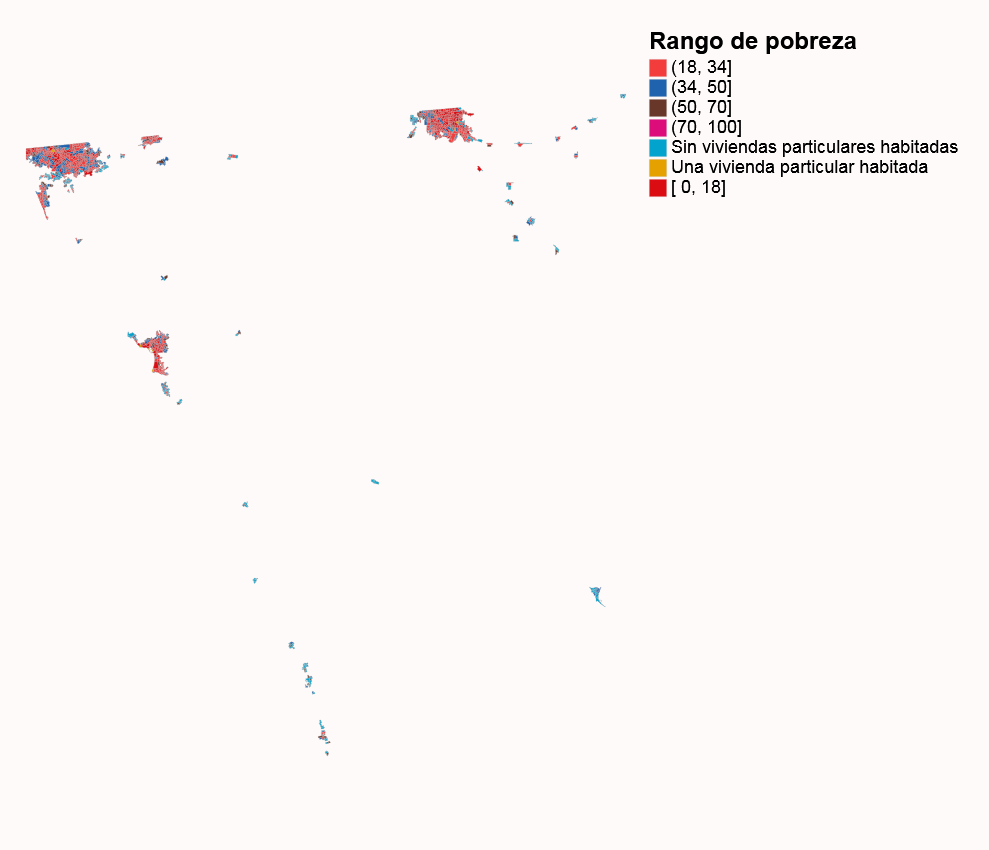

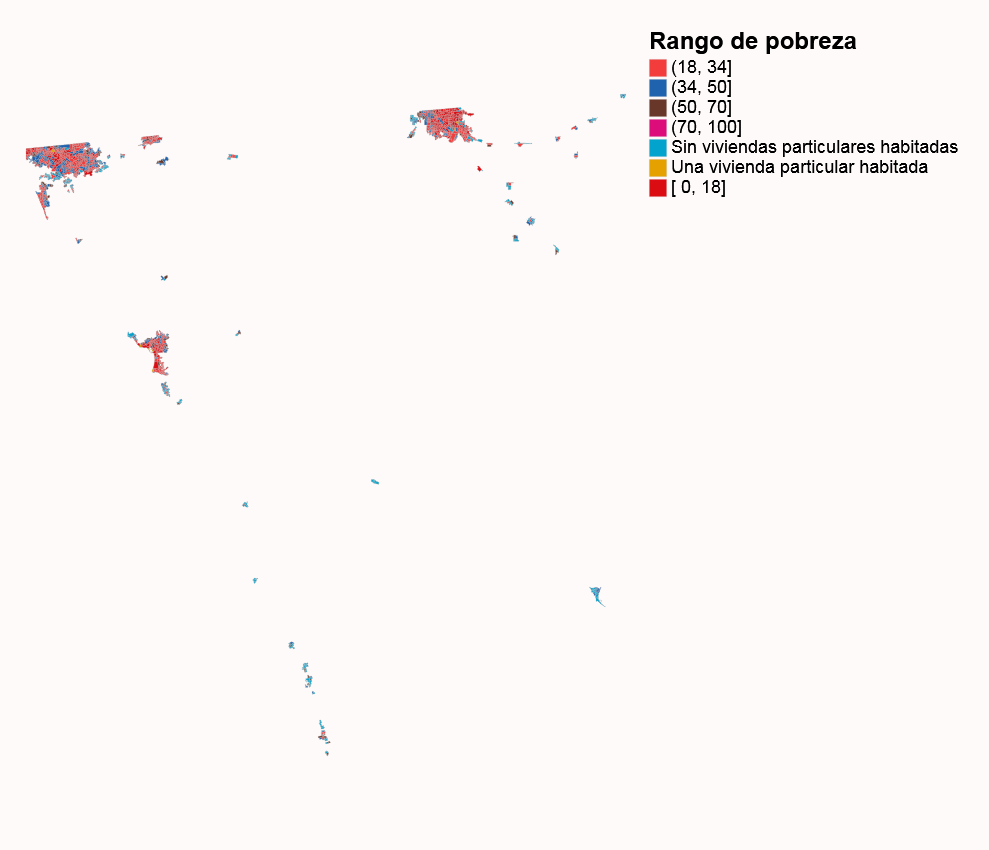

In [86]:
make_state_chart(estado = "Baja California")

In [157]:
from ipywidgets import IntSlider, Output
from IPython.display import display
display(IntSlider())
out = Output()
display(out)
with out:
    print('hi')

IntSlider(value=0)

Output()